In [1]:
import pickle
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Single run

In [4]:
pickle_name = "./Results/Run39/Results_final_pickle.pkl"
# pickle_name = "./Results/Run23/Results29_pickle.pkl"

with open(pickle_name, 'rb') as handle:
    dict_data = pickle.load(handle)
df = pd.DataFrame.from_dict(dict_data)

In [29]:
df['ratio n1/b1'] = df['n1'] /df['b1'] 
df['ratio n2/b2'] = df['n2'] /df['b2'] 
df['ratio n3/b3'] = df['n3'] /df['b3'] 
df['cummax'] = df['Performance'].cummax()
# df.sort_values(['Performance'], ascending=[False],inplace=True)
df

,Epoch,Ant,Performance,init,n1,n2,n3,simd,Olevel,num_thread,b1,b2,b3,ratio n1/b1,ratio n2/b2,ratio n3/b3,cummax
0,0,0,1280.83,init,512,512,1024,avx2,-O2,16,512,32,128,1.000000,16.000000,8.000000,1280.83
1,0,1,1220.96,init,512,512,1024,avx2,-Ofast,16,400,16,96,1.280000,32.000000,10.666667,1280.83
2,0,2,1197.45,init,512,512,1024,avx,-O3,16,464,32,128,1.103448,16.000000,8.000000,1280.83
3,0,3,1169.93,init,512,512,1024,avx,-Ofast,16,336,16,32,1.523810,32.000000,32.000000,1280.83
4,0,4,1162.14,init,512,512,1024,avx2,-O2,16,272,16,16,1.882353,32.000000,64.000000,1280.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7494,49,145,1176.71,init,512,512,1024,avx2,-O3,16,448,16,48,1.142857,32.000000,21.333333,1565.94
7495,49,146,1173.67,init,512,512,1024,avx512,-O2,16,448,16,48,1.142857,32.000000,21.333333,1565.94
7496,49,147,1160.99,init,512,512,1024,avx,-Ofast,16,448,16,208,1.142857,32.000000,4.923077,1565.94
7497,49,148,1153.84,init,512,512,1024,avx512,-Ofast,16,448,16,128,1.142857,32.000000,8.000000,1565.94


In [30]:
def pop_std(x):
    return x.std(ddof=0)

df_stat = df[['Epoch', 'Performance','cummax']].groupby(['Epoch'], as_index=True).agg({'Performance':['mean',pop_std,'min','max'],'cummax':'last'}).reset_index()
df_stat.columns = ['Epoch','Avg Performance', 'Std','min','max','cummax']


In [32]:
# df_stat

Text(0, 0.5, 'Throughput [MPoints/s]')

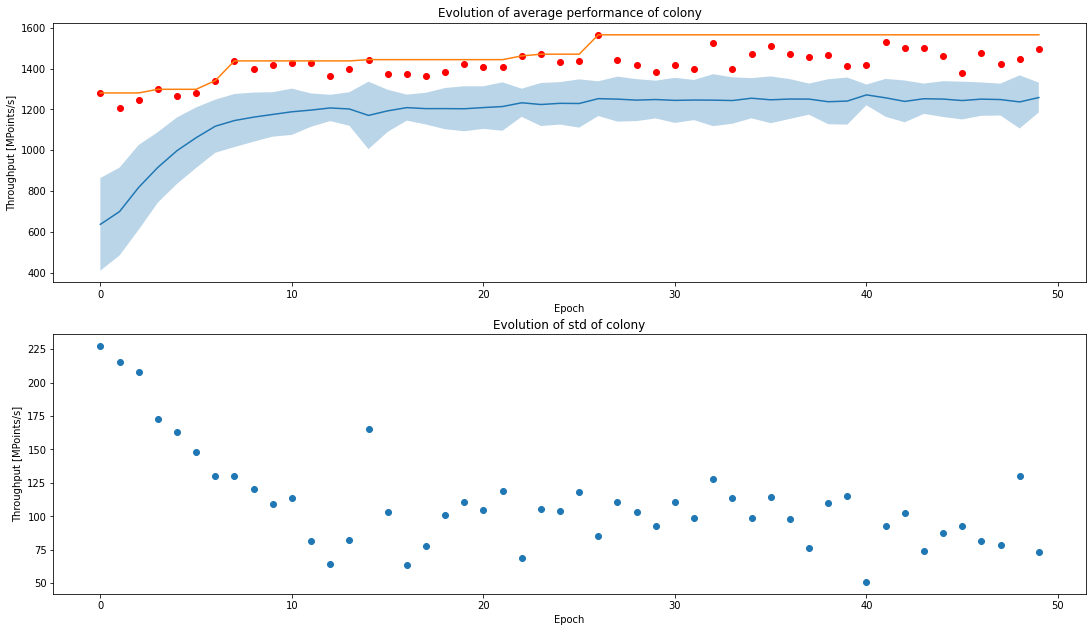

In [33]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(18.5, 10.5)
ax1.plot(df_stat['Epoch'], df_stat['Avg Performance'])
ax1.plot(df_stat['Epoch'], df_stat['cummax'])
ax1.scatter(df_stat['Epoch'], df_stat['max'], color = 'r')

# ax1.plot(df_stat['Epoch'], df_stat['min'], color = 'r')

ax1.fill_between(df_stat['Epoch'], df_stat['Avg Performance']-1*df_stat['Std'], df_stat['Avg Performance']+1*df_stat['Std'] ,alpha=0.3)
ax1.title.set_text('Evolution of average performance of colony')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Throughput [MPoints/s]')
# ax1.legend(['Avg Performance with 1 std', 'Best solution','max'])


ax2.scatter(df_stat['Epoch'], df_stat['Std'])
ax2.title.set_text('Evolution of std of colony')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Throughput [MPoints/s]')




In [58]:
counter = 0
filename = "./Plots/Plot{}.png"

In [61]:
while os.path.isfile(filename.format(counter)):
    counter += 1
filename = filename.format(counter)
fig.savefig(filename, dpi=100)


# Multiple files

In [28]:
pickle_name = "Results_final_pickle.pkl"

import os
rootdir = os.getcwd() + '/Results'
list_dict_data = []
list_runs = []
for subdir, dirs, files in os.walk(rootdir):
    if 'Run' in subdir:
        path = os.path.join(subdir, pickle_name)
        run = os.path.basename(subdir)
        if os.path.isfile(path):
            with open(path, 'rb') as handle:
                dict_data_mult = pickle.load(handle)
            list_dict_data.append(dict_data_mult)
            list_runs.append(run)
            
# convert dict to dataframes
dataframes = [pd.DataFrame(d) for d in list_dict_data]
df_mult = pd.concat([df.assign(Run=key) for key, df in zip(list_runs, dataframes)])
        

In [42]:
df_mult['ratio n1/b1'] = df_mult['n1'] /df_mult['b1'] 
df_mult['ratio n2/b2'] = df_mult['n2'] /df_mult['b2'] 
df_mult['ratio n3/b3'] = df_mult['n3'] /df_mult['b3'] 
df_mult['cummax'] = df_mult.groupby(['Run'])['Performance'].agg(['cummax'])
df_mult.sort_values(['Performance'], ascending=[False],inplace=True)
# df_mult.loc[df_mult['Run'] == 'Run39']


In [45]:
df_mult.head(20)

,Epoch,Ant,Performance,init,n1,n2,n3,simd,Olevel,num_thread,b1,b2,b3,Run,ratio n1/b1,ratio n2/b2,ratio n3/b3,cummax
1049,7,0.0,1736.86,init,320,608,896,avx512,-Ofast,16,336,15,248,Run42,0.952381,40.533333,3.612903,1736.86
599,4,0.0,1729.21,init,288,928,832,avx512,-O3,16,352,34,134,Run42,0.818182,27.294118,6.208955,1729.21
749,5,0.0,1729.00,init,448,864,832,avx512,-Ofast,16,512,17,238,Run42,0.875000,50.823529,3.495798,1729.21
1050,7,1.0,1725.15,init,352,864,800,avx512,-O3,16,336,17,175,Run42,1.047619,50.823529,4.571429,1736.86
449,3,0.0,1693.66,init,480,864,768,avx512,-O3,16,496,20,216,Run42,0.967742,43.200000,3.555556,1693.66
149,1,0.0,1679.90,init,320,736,800,avx512,-O3,16,352,14,201,Run42,0.909091,52.571429,3.980100,1679.90
299,2,0.0,1677.28,init,320,896,896,avx,-O2,16,400,25,231,Run42,0.800000,35.840000,3.878788,1679.90
899,6,0.0,1677.05,init,320,960,736,avx2,-Ofast,16,480,19,174,Run42,0.666667,50.526316,4.229885,1729.21
1051,7,2.0,1667.43,init,288,960,896,avx2,-Ofast,16,464,33,180,Run42,0.620690,29.090909,4.977778,1736.86
300,2,1.0,1656.75,init,320,992,576,avx,-O3,16,336,12,169,Run42,0.952381,82.666667,3.408284,1679.90
